En este Script se revisan los siguientes conceptos.

 -1.Iteradores e Iterables, funciones enumerate() y zip().
 
 -2.Lista de comprensiones y generadores
 
 -3.Unificando todo.


# 1. Objetos Iteradores e Iterables.

Los iteradores son los espíritus omnipresentes de Python. Están en todas partes y debes haberte encontrado con ellos en algún programa u otro. 
Los iteradores son objetos que le permiten recorrer todos los elementos de una colección, independientemente de su implementación específica.

Eso significa que, si alguna vez usó bucles para iterar o ejecutar los valores en un contenedor, habrá utilizado un iterador.

Iterable : Objeto donde se iteran sobre sus elementos, devuelven un iterador.

Iterador : Objeto que mantiene el estado y produce el siguiente valor.

In [140]:
#Ejemplo; Vamos a iterar los elementos
Iterable = ['jay garrick', 'barry allen', 'wally west', 'bart allen']

In [74]:
#Extraemos el elemento iterador del objeto Iterable.
#Con la funcion iter(), convertimos el Objeto Iterable en Iterador para que nos pueda devolver sus elementos
#como si corrieramos un for.
Iterador = iter(Iterable) 
print(Iterador)

In [75]:
#Ya tenemos un objeto iterador, cada vez que lo llamemos nos arrojara el siguiente elemento que contiene.
#next() Funcion para recuperar los valores uno por uno del objeto iterador.
print(next(Iterador)) 
print(next(Iterador))
print(next(Iterador))
print(next(Iterador))

jay garrick
barry allen
wally west
bart allen


El iterador es aquel elemento con el cual se opera el Iterable.

In [76]:
for Iterador in Iterable:
    print(Iterador)

jay garrick
barry allen
wally west
bart allen


La funcion iter() coniverte un objeto en Iterador, que significa que cuando lo llamemos con la funcion
next() arrojara los elementos como si corrieramos un for.

Un uso util seria creando secuencias.

Un gran uso de la funcion iter() es que nos permite tener un codigo mas limpio y eficiente, puesto que 
no es necesario dejar especificado un for para realizar acciones ciclicas,

In [77]:
Iterador = iter(range(3))
print(next(Iterador))
print(next(Iterador))
print(next(Iterador))

0
1
2


Los iteradores en todo momento los hemos tenido presentes.

Por ejemplo, las funciones list() y sum() devuelven una lista y la suma de elementos, respectivamente.

In [78]:
valores = range(10,21)
print(valores)
valores_lista = list(valores)
print(valores_lista)
valores_suma = sum(valores)
print(valores_suma)

range(10, 21)
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
165


¿Nos preguntamos como es que fuciona un iterador internamente para procudir la secuencia cuando se le pregunta?

Construyendo un iterador que devuelva una serie de numeros.

In [153]:
#La forma facil de ver un iterable
[i for i in range(0,11)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [154]:
#Parte interna de un Iterable
class Series(object):
    def __init__(self, low, high):
        self.current = low
        self.high = high

    def __iter__(self):
        return self

    def __next__(self):
        if self.current > self.high:
            raise StopIteration
        else:
            self.current += 1
            return self.current - 1

n_list = Series(1,10)    
print(list(n_list))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


__iter__  devuelve el objeto iterador en sí y el __next__  método devuelve el siguiente valor del iterador.

Si no hay más elementos para devolver, se genera una StopIterationexcepción.

Está perfectamente bien si no podemos escribir el código de un iterador en este momento,

pero es importante que aprendamos el concepto básico detrás de él.

Veremos generadores más adelante, que es una forma mucho más fácil de implementar iteradores.


# Contenedores

Los contenedores son los objetos que tienen valores de datos.

Son compatibles con las pruebas de membresía, lo que significa se verifica si existe un valor en el contenedor.

Los contenedores son iterables: las listas, los conjuntos, el diccionario, la tupla y las cadenas son todos contenedores. Pero también hay otros iterables, como los archivos abiertos y los sockets abiertos.

In [80]:
if 1 in [1,2,3]:
    print('List')

if 4 not in {1,2,3}:
    print('Tuple')

if 'apple' in 'pineapple':
    print('String') 

List
Tuple
String


# Modulo Itertools

Itertools es un módulo de Python incorporado que contiene funciones para crear iteradores para un bucle eficiente.

En resumen, ¡ofrece muchas herramientas interesantes para trabajar con iteradores!

Algunos siguen proporcionando valores para un rango infinito, por lo tanto, solo se debe acceder mediante funciones o bucles que de hecho dejan de llamar para obtener más valores.

Vamos a ver algunas cosas interesantes que puedes hacer con la count función del itertoolsmódulo:

In [81]:
from itertools import count
sequence = count(start=0, step=1)
while(next(sequence) <= 10):
    print(next(sequence))

1
3
5
7
9
11


In [82]:
from itertools import cycle
dessert = cycle(['Icecream','Cake'])
count = 0
while(count != 4):
    print('Q. What do we have for dessert? A: ' + next(dessert))
    count+=1

Q. What do we have for dessert? A: Icecream
Q. What do we have for dessert? A: Cake
Q. What do we have for dessert? A: Icecream
Q. What do we have for dessert? A: Cake


# Importando una base lista para iterar

In [156]:
import pandas as pd
#El parametro chunksize Devuelve el objeto para iteracion.
#Base de datos mtcars traida de una url dl github a una ruta local.
datos = pd.read_csv("C:/Users/Finanzas/Documents/GitHub/Lecciones-python/mtcars.csv",chunksize = 10) 
print(datos)

In [157]:
#Se puede iterar el objeto datos, gracias al argumento chunksize
conteo_diccionario = {}

for x in datos :
    for y in x['cyl']:
        if y in conteo_diccionario.keys():
            conteo_diccionario[y] += 1
        else:
            conteo_diccionario[y] = 1
                
print(conteo_diccionario)

{6: 7, 4: 11, 8: 14}


Incorporando los dos ejemplos anteriores, cramos una funcion que solo coloquemos la ruta del archivo, los elementos que deseamos trabajar
y la columna en la que deseamos contar

In [160]:
def count_entries(csv_file, c_size, colname):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    
    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Iterate over the file chunk by chunk
    for chunk in pd.read_csv(csv_file, chunksize=c_size):

        # Iterate over the column in DataFrame
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1

    # Return counts_dict
    return counts_dict

In [161]:
count_entries("C:/Users/Finanzas/Documents/GitHub/Lecciones-python/mtcars.csv",10,'am')

{1: 13, 0: 19}

# Funciones enumerate() y zip()

Otra funcion util es enumerate() devuelve un enumerate objeto que produce una secuencia de tuplas, y cada una de las tuplas es un par índice-valor .

In [162]:
# Creacion de la lista mutants
mutants = ['charles xavier', 
            'bobby drake', 
            'kurt wagner', 
            'max eisenhardt', 
            'kitty pride']

# Creacion de la lista con tuplas.
mutant_list = list(enumerate(mutants))

print(mutant_list)


[(0, 'charles xavier'), (1, 'bobby drake'), (2, 'kurt wagner'), (3, 'max eisenhardt'), (4, 'kitty pride')]


Se genero la variable Index1 en la lista mutants al momento de enumerar los registros, corremos un for.

In [88]:
for index1, value1 in enumerate(mutants):
    print(index1, value1)

0 charles xavier
1 bobby drake
2 kurt wagner
3 max eisenhardt
4 kitty pride


Podemos modificar el parametro de la funcion enumerate para que la indexacion comienze en 1.

In [89]:
for index2, value2 in enumerate(mutants, start=1):
    print(index2, value2)

1 charles xavier
2 bobby drake
3 kurt wagner
4 max eisenhardt
5 kitty pride


zip() Unifica y agrupas las listas.

zip() que toma cualquier número de iterables y devuelve un zip objeto que es un iterador de tuplas.

Si desea imprimir los valores de un zip objeto, puede convertirlo en una lista y luego imprimirlo.

Imprimir solo un zip objeto no devolverá los valores a menos que lo desempaquete primero.

In [6]:
alias = ['profesor x','iceman','nightcrawler','magneto','shadowcat']
poderes = ['telepathy','thermokinesis','teleportation','magnetokinesis','intangibility']

# Uniendo 3 listas con la funcion zip()
mutant_data = list(zip(mutants, alias, poderes))

print(mutant_data)

[('charles xavier', 'profesor x', 'telepathy'), ('bobby drake', 'iceman', 'thermokinesis'), ('kurt wagner', 'nightcrawler', 'teleportation'), ('max eisenhardt', 'magneto', 'magnetokinesis'), ('kitty pride', 'shadowcat', 'intangibility')]


Otra forma de agrupar todo con la funcion zip().

In [91]:
mutant_zip = zip(mutants, alias, poderes)

print(mutant_zip)

Corremos un for para ver la agrupacion.

In [92]:
for value1, value2, value3 in mutant_zip:
    print(value1, value2, value3)

charles xavier profesor x telepathy
bobby drake iceman thermokinesis
kurt wagner nightcrawler teleportation
max eisenhardt magneto magnetokinesis
kitty pride shadowcat intangibility


Juguemos con zip() un poco más.

No hay función de descompresión para hacer lo contrario de lo que zip() hace.

Sin embargo, podemos revertir lo que se ha zip usando zip() junto con una pequeña ayuda *! * desempaqueta un iterable como una

lista o una tupla en argumentos posicionales en una llamada a función.

In [93]:
z1 = zip(mutants, poderes)

# Separamos los elementos de zip con *
print(*z1)

('charles xavier', 'telepathy') ('bobby drake', 'thermokinesis') ('kurt wagner', 'teleportation') ('max eisenhardt', 'magnetokinesis') ('kitty pride', 'intangibility')


In [94]:
# Unimos dos listas
z1 = zip(mutants, poderes)

# Separamos las listas que acabamos de unir y cada una la guardamos en dos varibles distintas
result1, result2 = zip(*z1)

# Vemos que no son iguales pasamos de tener listas a tuplas.
print(result1 == mutants)
print(result2 == poderes)
print(type(result1))
print(type(mutants))


False
False
<class 'tuple'>
<class 'list'>


# Segunda Parte: Listas Generadoras

Las listas de Comprension, son listas en las que podemos escribir un for de manera simplificada.

In [95]:
#Completando la lista con un bucle for:
numeros = [10,20,30,40,50,60]
nuevos_numeros = []

for numeros in numeros:
    nuevos_numeros.append(numeros + 1)

print(nuevos_numeros)

[11, 21, 31, 41, 51, 61]


In [96]:
#Completando la misma lista con una lista de comprension
numeros = [10,20,30,40,50,60]
nuevos_numeros = [(num + 1) for num in numeros]
print(nuevos_numeros)

[11, 21, 31, 41, 51, 61]


In [97]:
#Otro ejemplo de lista de comprension
secuencias = [num for num in range(11)]
print(secuencias)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Mas sobre listas de Comprension.

Contraer bucles para compilar listas en una sola linea.

Listas de Comprension se pueden construir sobre objetos Iterables.

Componentes;

    -Tienen estructura de un Iterable
    -Cuentan con variables Iteradoras
    -Necesitamos definir una expresion de salida


In [98]:
#En el siguiente ejemplo, correremos dos for de manera "tradicional"
pairs_1 = []
for num1 in range(0,2):
    for num2 in range(6,8):
        pairs_1.append((num1,num2))
print(pairs_1)

[(0, 6), (0, 7), (1, 6), (1, 7)]


In [99]:
#Generando la misma lista con una lista de comprension
pairs_1 = [(num1, num2) for num1 in range(0, 2) for num2 in range(6, 8)]
print(pairs_1)

[(0, 6), (0, 7), (1, 6), (1, 7)]


In [100]:
#Otro ejemplo para listas de Comprension
cuadrados = [(i**2) for i in range(0,10)]
cuadrados

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

Podemos anhidar en las listas de comprension, en el siguiente ejemplo la primera parte del codigo
se genera una lista del 0 a 4 y luego esa misma lista se creara 5 veces.

In [101]:
matriz = [[col for col in range(5)] for row in range(5)]

print(matriz)

for row in matriz:
    print(row)

[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4]]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


Tambien podemos colocar condicionales dentro de nuestras listas de Comprension.

In [102]:
print(mutants)
#Solicitaremos que solo se muestren los nombres que tienen mas de 14 caracteres
nuevos = [miembro for miembro in mutants if len(miembro) >= 14]

print(nuevos)

['charles xavier', 'bobby drake', 'kurt wagner', 'max eisenhardt', 'kitty pride']
['charles xavier', 'max eisenhardt']


Cambiemos un poco el orden en que escribimos el condicional y agreguemos un else

In [103]:
#Misma condicion,pero en vez de borara los elementos que no cumplen se sustituyen por ''
nuevos = [miembro if len(miembro) >= 14 else '' for miembro in mutants]
print(nuevos)

['charles xavier', '', '', 'max eisenhardt', '']


Tambien existen los Diccionarios de Comprension

In [104]:
nuevos = {miembro:len(miembro) for miembro in mutants}
print(nuevos)

{'charles xavier': 14, 'bobby drake': 11, 'kurt wagner': 11, 'max eisenhardt': 14, 'kitty pride': 11}


# Expresiones Generadoras

Diferencias;

    -Tienen la misma que las listas de comprension pero se escriben con ()
    -Las listas de comprension regresan una lista
    -Las Generadoras regresan un objeto generador
    -Ambas pueden iterarse
    -Listas Generadoras permiten trabajar con grandes datos y operaciones ya que la info no se guarda en memoria.

In [105]:
#Lista Comprension
[x * 2 for x in range(10)]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [106]:
#Lista Generadora
(x * 2 for x in range(10))

<generator object <genexpr> at 0x0000021A5355B570>

Podemos ver que los resultados son diferentes.

In [107]:
#Para imprimir los resultados de una lista generadora
Generador = (x * 2 for x in range(10))

for num in Generador:
    print(num)

0
2
4
6
8
10
12
14
16
18


En los generadores se arroja elemento por elemento, se pueden guardar los valores en una lista.

In [108]:
Generador = (x * 2 for x in range(10))
list(Generador)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

Un buen ejemplo para demostrar la gran diferencia entre listas de Comprension y Generadoras es el siguiente:

Intetaremos crear una lista con 10**1000000 elementos, suena a que una computadora colapsaria.

In [109]:
#En el caso de una lista de comprension no es posible correr el codigo
#Ya que necesitamos mucha memoria y la maquina nos marca un error o colapsa.
#[num for num in range(10*1000000)]

In [110]:
#En el caso de una lista Generadora si es posible
#Ya que el objeto que arroja es un iterador y no ocupa espacio en la memoria
a = (num for num in range(10**1000000))
print(next(a))
print(next(a))
print(next(a))
print(next(a))
print(next(a))
print(next(a))

0
1
2
3
4
5


Aplicacion de funciones en listas generadoras.

In [1]:
#Se va guardando el valor sobre cada elemento y no se guarda en memoria hasta que se imprime.
lannister = ['cersei','jaime','tywin','tyrion','joffrey']

longitud = (len(persona) for persona in lannister)

for valor in longitud:
    print(valor)

6
5
5
6
7


En ejemplos anteriores, nos hemos ocupado principalmente de escribir expresiones generadoras, que usan sintaxis de comprensión.

¡Poder usar la sintaxis de comprensión para las expresiones del generador hizo el trabajo mucho más fácil!

Ahora no solo hay expresiones de generador, también hay funciones de generador.

Las funciones del generador son funciones que, al igual que las expresiones generadoras,

producen una serie de valores, en lugar de devolver un solo valor.

Una función de generador se define como una función normal, pero cada vez que genera un valor,

utiliza la palabra clave en yield en lugar de return.

In [112]:
#Ejemplo; Funcion Generadora (en vez de escribir return para devolver un valor se coloca yield)
lannister = ['cersei','jaime','tywin','tyrion','joffrey']

def generador_longitud(lista_entrada):
    
    for persona in lista_entrada:
        yield len(persona)

In [113]:
#Imprimimos los valors de nuestra funcion generadora
for valores in generador_longitud(lannister):
    print(valores)

6
5
5
6
7


# Unificando Todo

En esta seccion veremos crearemos distintas funciones, en las que el motor son los objetos iterables,funciones como zip,
objetos generadores y todo lo que vimos anteriormente.

# Funcion que une listas en diccionarios.

In [7]:
#Reunimos un grupo de listas para almacenarlas en un diccionario
z_lista = zip(mutants,alias)
z_dict = dict(z_lista)
print(z_dict)

{'charles xavier': 'profesor x', 'bobby drake': 'iceman', 'kurt wagner': 'nightcrawler', 'max eisenhardt': 'magneto', 'kitty pride': 'shadowcat'}


 Para no tener que escribir el codigo anterior cada que queramos unir dos listas, definimos una funcion.

In [8]:
# Definimos lists2dict()
def lists2dict(list1, list2):
    """list1 devuelve las llaves y list2 los elementos"""

    # Unimos con la funcion zip()
    zipped_lists = zip(list1, list2)

    # Lo volvemos diccionario
    rs_dict = dict(zipped_lists)

    return rs_dict

rs_fxn = lists2dict(mutants,alias)

print(rs_fxn)

{'charles xavier': 'profesor x', 'bobby drake': 'iceman', 'kurt wagner': 'nightcrawler', 'max eisenhardt': 'magneto', 'kitty pride': 'shadowcat'}


# Funcion que cuenta los distintos registro por medio de generadores

Antes de trabajar con DataFrames es util conocer como se estructuraria el dataFrame por medio de listas.

Para esto crearemos un diccionario por medio de lista de comprension

In [16]:
lista = zip(mutants,poderes,alias)
columna = ['mutante','poder','alias']
test = [lists2dict(columna,sublista) for sublista in lista]
test
pd.DataFrame(test)

,alias,mutante,poder
0,profesor x,charles xavier,telepathy
1,iceman,bobby drake,thermokinesis
2,nightcrawler,kurt wagner,teleportation
3,magneto,max eisenhardt,magnetokinesis
4,shadowcat,kitty pride,intangibility


Recordemos los objetos Iterables y la velocidad con la que obtenemos respuesta de ellos.

En los siguientes ejemplos, veremos como seria la estructura de un DataFrame para ser trabajada como Iterable.

Procesamiento de datos fragmentados.

In [61]:
import os 
print(os.getcwd()) #Vemos la ruta en la que tenemos el archivo 
#Con las funciones with open(), Abrimos una conexion con el administrador de contexto.
#Su proposito es garantizr que los recursos se asignen eficientemente al abrir la conexion con el archivo.
with open('mtcars.csv') as file: 
    file.readline()
    
print(file)

C:\Users\Finanzas\Documents\GitHub\Lecciones-Python
<_io.TextIOWrapper name='mtcars.csv' mode='r' encoding='cp1252'>


En el siguiente ejemplo se busca procesar los datos por partes, en caso de tener una gran cantidad de informacion.

Se procesa linea por linea para no almacenar la informacion en Memoria.

Lo que haremos es ir contanto los registro distintos.

In [79]:
#Abre la conexion con el administrador de contexto
with open('mtcars.csv') as file:

    # Omite el nombre de las Columnas
    file.readline()

    # Creamos el diccionario
    counts_dict = {}

    # Procesa las 10 primeras lineas del archivo
    for j in range(0,10):

        # Fivide la linea actual en una lista
        line = file.readline().split(',')

        # Obtenemos el valor de la primer columna
        first_col = line[0]

        # Si el valor de la columa esta en el diccionario incrementamos su valor
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1

        # En otro caso agregamos el nuevo valor a la columna
        else:
            counts_dict[first_col] = 1

# Print the resulting dictionary
print(counts_dict)


{'"Mazda RX4"': 1, '"Mazda RX4 Wag"': 1, '"Datsun 710"': 1, '"Hornet 4 Drive"': 1, '"Hornet Sportabout"': 1, '"Valiant"': 1, '"Duster 360"': 1, '"Merc 240D"': 1, '"Merc 230"': 1, '"Merc 280"': 1}


Escribir un generador para cargar los datos a trozos, es un ejercicio para ver el funcionamiento de carga de un arhivo.

En el ejemplo anterior se vio como ir leyendo por partes un archivo, per que pasa si queremos leer todo el arhivo.

Para esto veremos la estructura de un Iterable y es como ver el motor de la funcion pd.read_csv("mtcars.csv". chunksize=10).

In [80]:
# Funcion, que evalua los datos de forma perezosa
def read_large_file(file_object):
    """Una función de generador para leer un archivo grande perezosamente"""

    # Bucle que va hasta el final del archivo
    while True:

        # Lemos una linea del archivo
        data = file_object.readline()

        # Rompe si es el final del archivo
        if not data:
            break

        # Yield (Retorna) la linea de datos
        yield data
        
# Abrimos la conexcion del administrador de contexto
with open('mtcars.csv') as file:

    # Creamos el objeto generador con la funcion que acabamos de definir
    gen_file = read_large_file(file)

    # Imprimimos el archivo de manera Iterable
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))

"","mpg","cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"

"Mazda RX4",21,6,160,110,3.9,2.62,16.46,0,1,4,4

"Mazda RX4 Wag",21,6,160,110,3.9,2.875,17.02,0,1,4,4



Combinando los dos ejemplos anteriores ya no seria necesario leer el archivo por partes.

Podriamos contar todos los datos de la base, gracias a la funcion que creamos read_large_file()

In [82]:
counts_dict = {}

with open('mtcars.csv') as file:

    for line in read_large_file(file): #Recordemos que esta parte la definiamos con un range() para leer el archivo por partes

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

print(counts_dict)


{'""': 1, '"Mazda RX4"': 1, '"Mazda RX4 Wag"': 1, '"Datsun 710"': 1, '"Hornet 4 Drive"': 1, '"Hornet Sportabout"': 1, '"Valiant"': 1, '"Duster 360"': 1, '"Merc 240D"': 1, '"Merc 230"': 1, '"Merc 280"': 1, '"Merc 280C"': 1, '"Merc 450SE"': 1, '"Merc 450SL"': 1, '"Merc 450SLC"': 1, '"Cadillac Fleetwood"': 1, '"Lincoln Continental"': 1, '"Chrysler Imperial"': 1, '"Fiat 128"': 1, '"Honda Civic"': 1, '"Toyota Corolla"': 1, '"Toyota Corona"': 1, '"Dodge Challenger"': 1, '"AMC Javelin"': 1, '"Camaro Z28"': 1, '"Pontiac Firebird"': 1, '"Fiat X1-9"': 1, '"Porsche 914-2"': 1, '"Lotus Europa"': 1, '"Ford Pantera L"': 1, '"Ferrari Dino"': 1, '"Maserati Bora"': 1, '"Volvo 142E"': 1}


# Funcion para filtrar valores y graficar, por medio de objetos iterables.

No siempre es necesario cargar los arhivos con tanta dificultad, el paquete pandas ya incluye funciones que 

devuelven los datos iterables (especificando en chunksize la cantidad de datos que deseamos trabajar).

In [84]:
import pandas as pd

df_reader = pd.read_csv('mtcars.csv', chunksize=3)

print(next(df_reader))
print(next(df_reader))

      Unnamed: 0   mpg  cyl  disp   hp  drat     wt   qsec  vs  am  gear  carb
0      Mazda RX4  21.0    6   160  110  3.90  2.620  16.46   0   1     4     4
1  Mazda RX4 Wag  21.0    6   160  110  3.90  2.875  17.02   0   1     4     4
2     Datsun 710  22.8    4   108   93  3.85  2.320  18.61   1   1     4     1
          Unnamed: 0   mpg  cyl  disp   hp  drat     wt   qsec  vs  am  gear  \
3     Hornet 4 Drive  21.4    6   258  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8   360  175  3.15  3.440  17.02   0   0     3   
5            Valiant  18.1    6   225  105  2.76  3.460  20.22   1   0     3   

   carb  
3     1  
4     2  
5     1  


Haremos el proceso inverso sobre un DataFrame pasando a valores de lista.

In [116]:
df_reader = pd.read_csv('mtcars.csv', chunksize=100)
base = next(df_reader)
filtro = base[base['cyl'] == 4]
zip_filtro = zip(filtro.iloc[:,2],filtro.iloc[:,7])
lista = list(zip_filtro)
print(lista)

[(4, 18.61), (4, 20.0), (4, 22.9), (4, 19.47), (4, 18.52), (4, 19.9), (4, 20.01), (4, 18.9), (4, 16.7), (4, 16.9), (4, 18.6)]


Crearemos una nueva columna apartir de los valores extraidos de la lista.

In [129]:
filtro['Nueva_Columna'] = [int(tup[0] * tup[1] * 10) for tup in lista] 
filtro

C:\Users\Finanzas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Nueva_Columna
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,744
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,800
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,916
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,778
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,740
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,796
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1,800
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1,756
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2,668
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2,676


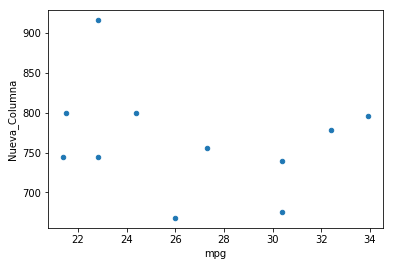

In [135]:
import matplotlib.pyplot as plt
filtro.plot(kind = 'scatter', x = 'mpg', y = 'Nueva_Columna')
plt.show()

C:\Users\Finanzas\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


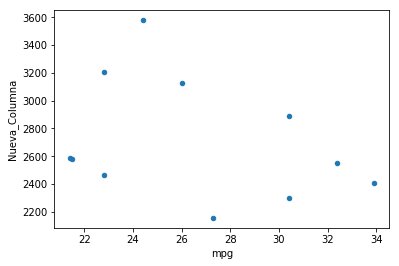

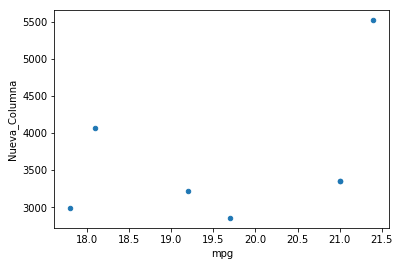

In [139]:
# Funcion para general para graficar por cyl
def plot_pop(filename, country_code):

    # Inicializamos el objeto Iterable
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    data = pd.DataFrame()
    
    # Iteramos sobre el urb_pop_reader
    for df_urb_pop in urb_pop_reader:
        # Filtro 
        df_pop_ceb = df_urb_pop[df_urb_pop['cyl'] == country_code]

        # Union zip de las listas
        pops = zip(df_pop_ceb['mpg'],
                    df_pop_ceb['disp'])

        # Regresamos el objeto como lista
        pops_list = list(pops)

        # Usamo una lista de comprension para crear la nueva columna
        df_pop_ceb['Nueva_Columna'] = [int(tup[0] * tup[1]) for tup in pops_list]
    
        # Agregamos la nueva columna
        data = data.append(df_pop_ceb)

    # Graficamos
    data.plot(kind='scatter', x='mpg', y='Nueva_Columna')
    plt.show()

#Uso de la funcion 
fn = 'mtcars.csv'

plot_pop(fn, 4)
plot_pop(fn, 6)
